In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
from sklearn.decomposition import PCA
import os, sys

In [2]:
df = pd.read_csv('../raw_data/shopee-product-matching/train.csv')
df

posting_id                                 image  \
0       train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg   
1      train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg   
2      train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg   
3      train_2406599165  00117e4fc239b1b641ff08340b429633.jpg   
4      train_3369186413  00136d1cf4edede0203f32f05f660588.jpg   
...                 ...                                   ...   
34245  train_4028265689  fff1c07ceefc2c970a7964cfb81981c5.jpg   
34246   train_769054909  fff401691371bdcb382a0d9075dfea6a.jpg   
34247   train_614977732  fff421b78fa7284284724baf249f522e.jpg   
34248  train_3630949769  fff51b87916dbfb6d0f8faa01bee67b8.jpg   
34249  train_1792180725  ffffa0ab2ae542357671e96254fa7167.jpg   

            image_phash                                              title  \
0      94974f937d4c2433                          Paper Bag Victoria Secret   
1      af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2      b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3      8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4      a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   
...                 ...                                                ...   
34245  e3cd72389f248f21  Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...   
34246  be86851f72e2853c    MamyPoko Pants Royal Soft - S 70 - Popok Celana   
34247  ad27f0d08c0fcbf0  KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...   
34248  e3b13bd1d896c05c  Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...   
34249  af8bc4b2d2cf9083  FLEX TAPE PELAPIS BOCOR / ISOLASI AJAIB / ANTI...   

       label_group  
0        249114794  
1       2937985045  
2       2395904891  
3       4093212188  
4       3648931069  
...            ...  
34245   3776555725  
34246   2736479533  
34247   4101248785  
34248   1663538013  
34249    459464107  

[34250 rows x 5 columns]

In [3]:
images = [image for image in df['image']]
size_img = []
for image in images:
    image_size=Image.open(f"../raw_data/shopee-product-matching/train_images/{image}").size
    size_img.append(image_size)
size_img

[(1024, 1024),
 (1000, 1000),
 (640, 640),
 (640, 640),
 (756, 756),
 (640, 640),
 (640, 640),
 (640, 640),
 (300, 300),
 (700, 700),
 (700, 700),
 (1000, 1000),
 (1000, 1000),
 (449, 449),
 (640, 640),
 (640, 640),
 (1024, 1024),
 (800, 800),
 (314, 314),
 (595, 595),
 (4500, 4501),
 (700, 700),
 (604, 604),
 (665, 665),
 (700, 700),
 (640, 640),
 (1024, 1024),
 (1024, 1024),
 (700, 700),
 (700, 700),
 (640, 640),
 (640, 640),
 (800, 800),
 (640, 640),
 (640, 640),
 (640, 640),
 (1000, 1000),
 (1000, 1000),
 (720, 720),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (640, 640),
 (640, 640),
 (1024, 1024),
 (700, 700),
 (699, 699),
 (800, 800),
 (640, 640),
 (700, 700),
 (640, 640),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (800, 800),
 (1024, 1024),
 (640, 640),
 (640, 640),
 (1024, 1024),
 (1024, 1024),
 (700, 700),
 (820, 820),
 (640, 640),
 (960, 960),
 (640, 640),
 (748, 748),
 (800, 800),
 (1024, 1024),
 (1000, 1000),
 (1024, 1024),
 (640, 640),
 (640, 640),
 (800, 800),
 (669

In [4]:
df_squarred = []
for image in images:
    image_size=Image.open(f"../raw_data/shopee-product-matching/train_images/{image}").size
    if image_size[0] == image_size[1]:
        df_squarred.append(image)
    else:
        print('not square')
df_squarred

not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square
not square

['0000a68812bc7e98c42888dfb1c07da0.jpg',
 '00039780dfc94d01db8676fe789ecd05.jpg',
 '000a190fdd715a2a36faed16e2c65df7.jpg',
 '00117e4fc239b1b641ff08340b429633.jpg',
 '00136d1cf4edede0203f32f05f660588.jpg',
 '0013e7355ffc5ff8fb1ccad3e42d92fe.jpg',
 '00144a49c56599d45354a1c28104c039.jpg',
 '0014f61389cbaa687a58e38a97b6383d.jpg',
 '0019a3c6755a194cb2e2c12bfc63972e.jpg',
 '001be52b2beec40ddc1d2d7fc7a68f08.jpg',
 '001d7f5d9a2fac714f4d5f37b3baffb4.jpg',
 '001e11145b8e9bf5ac51110c0fdd8697.jpg',
 '001e11145b8e9bf5ac51110c0fdd8697.jpg',
 '001f4c8331d0554d133b10d85b7fafb2.jpg',
 '001f5580b058c6b8e33132190a757318.jpg',
 '002039aaf8618627a0442d5e89e5dda6.jpg',
 '0027aaf8dd8bdbf0e4f2c19024e436cf.jpg',
 '00286d2760e433a8a01cbd9e056144f7.jpg',
 '002f978c58a44a00aadfca71c3cad2bb.jpg',
 '00303ad1c062fdeaf5f41b9ffb71a5fb.jpg',
 '003524b70715bf6bfa00451ca08e66e0.jpg',
 '0035b8fc42955c0fa2301b68e2ffe861.jpg',
 '00369839c7d94411e54437b7cf59b603.jpg',
 '003906c6c6bba4cde15e5e854dba8f6d.jpg',
 '003a6fbbdf88f0

In [5]:
pd.DataFrame(df_squarred)

0
0      0000a68812bc7e98c42888dfb1c07da0.jpg
1      00039780dfc94d01db8676fe789ecd05.jpg
2      000a190fdd715a2a36faed16e2c65df7.jpg
3      00117e4fc239b1b641ff08340b429633.jpg
4      00136d1cf4edede0203f32f05f660588.jpg
...                                     ...
34127  fff1c07ceefc2c970a7964cfb81981c5.jpg
34128  fff401691371bdcb382a0d9075dfea6a.jpg
34129  fff421b78fa7284284724baf249f522e.jpg
34130  fff51b87916dbfb6d0f8faa01bee67b8.jpg
34131  ffffa0ab2ae542357671e96254fa7167.jpg

[34132 rows x 1 columns]

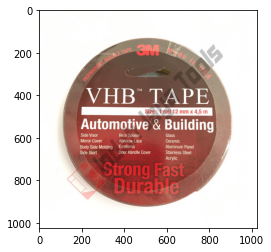

In [6]:
image = img.imread(f'../raw_data/shopee-product-matching/train_images/8cbe4bf9706bc177fd61071ef776be8c.jpg')
plt.imshow(image)

In [20]:
image_open=img.imread(f"../raw_data/shopee-product-matching/train_images/8cbe4bf9706bc177fd61071ef776be8c.jpg")
image_open

array([[[254, 254, 252],
        [254, 254, 252],
        [254, 254, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 252],
        [254, 254, 252],
        [254, 254, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 252],
        [254, 254, 252],
        [254, 254, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [19]:
img_squarred = []
# os.mkdir('../raw_data/shopee-product-matching/train_images/resized')
for image in df_squarred:
    image_open=Image.open(f"../raw_data/shopee-product-matching/train_images/{image}").resize((100,100))
    image_open.save(f"../raw_data/shopee-product-matching/train_images/resized/{image}")
    img_squarred.append(image_open)
img_squarred

[<PIL.Image.Image image mode=RGB size=100x100 at 0x1281EE460>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EEB80>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EE520>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EEDF0>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EEF10>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EEEE0>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EE220>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EE4C0>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EE8B0>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EEFD0>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EE670>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EE160>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EE940>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EE8E0>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281EED90>,
 <PIL.Image.Image image mode=RGB size=100x100 at 0x1281

data_projected = pca.fit_transform(faces.data)

In [21]:
img_squarred[0].__dict__

{'im': <ImagingCore at 0x128025370>,
 'mode': 'RGB',
 '_size': (100, 100),
 'palette': None,
 'info': {'jfif': 257,
  'jfif_version': (1, 1),
  'jfif_unit': 0,
  'jfif_density': (1, 1)},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 '_exif': None,
 'encoderinfo': {},
 'encoderconfig': (-1, False, 0, False, 0, 0, 0, -1, None, b'', b'')}

In [22]:
img_squarred[0].show()

In [26]:
pca = PCA(n_components=100)

In [28]:
data_projected = pca.fit_transform(img_squarred)

TypeError: float() argument must be a string or a number, not 'Image'

In [ ]:
data_reconstructed = pca.inverse_transform(data_projected)